In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
data=pd.read_csv('Downloads/HousingData.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
data.columns[data.isnull().any()]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'], dtype='object')

In [5]:
miss= data.isnull().sum()/len(data)
miss= miss[miss>0]
miss.sort_values(inplace=True)
miss

CRIM     0.039526
ZN       0.039526
INDUS    0.039526
CHAS     0.039526
AGE      0.039526
LSTAT    0.039526
dtype: float64

In [6]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss. index. names = ['Name']
miss['Name'] = miss.index


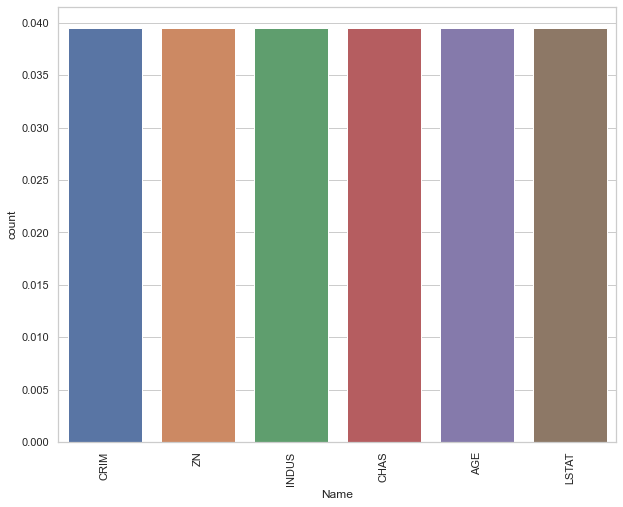

In [7]:
#plot the missing value count 
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss) 
plt.xticks(rotation = 90) 
plt.show()


C:\Anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

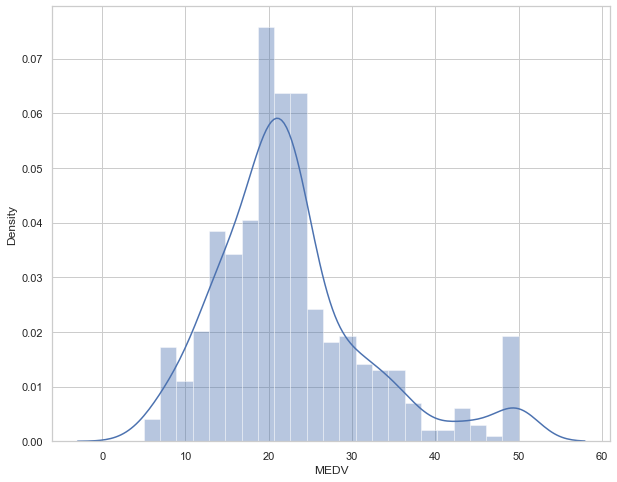

In [8]:
#Target variable
sns.distplot(data['MEDV'])

<AxesSubplot:>

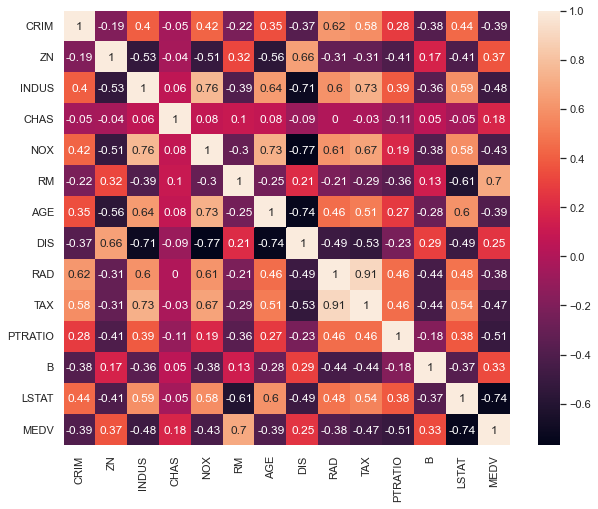

In [9]:
correlation_matrix=data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

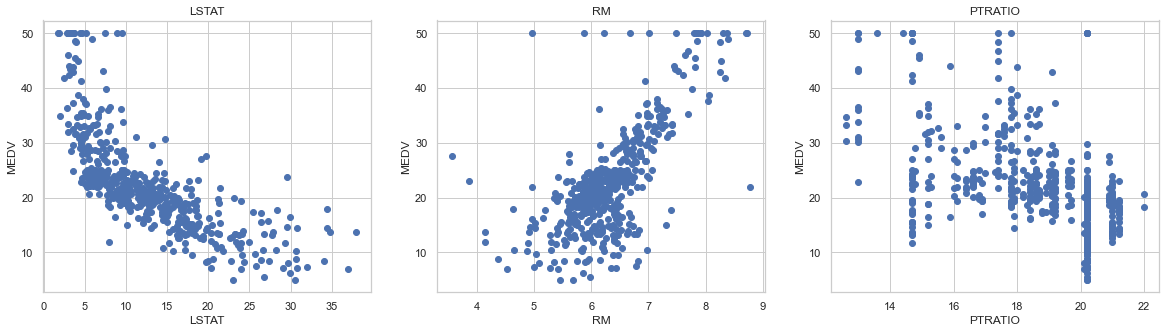

In [10]:
plt.figure(figsize=(20,5))
features=['LSTAT','RM','PTRATIO']
target=data['MEDV']

for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=data[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [11]:
data.dropna(inplace=True)

In [12]:
x=pd.DataFrame(np.c_[data['LSTAT'], data['RM'],data['PTRATIO']], columns=['LSTAT', 'RM','PTRATIO'])
x=x.fillna(x.mean()).values
y=data['MEDV'].values

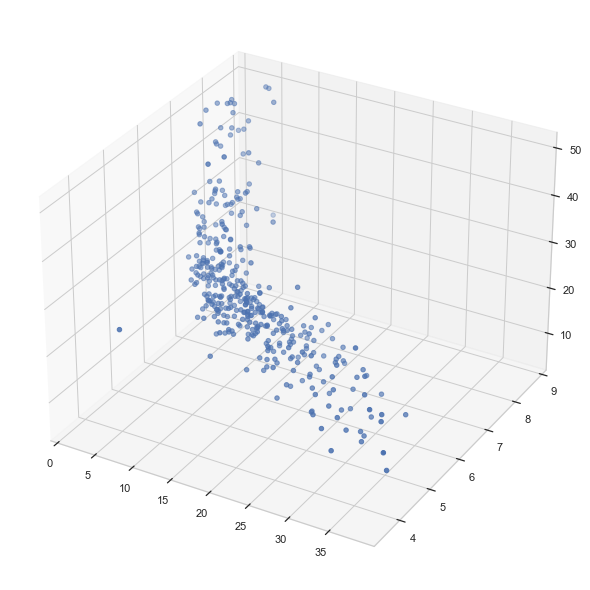

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=Axes3D(fig)
ax.scatter(x[:,0], x[:,1], y)
plt.show()

In [14]:
def featureNormalize(x):
    mu=np.mean(x, axis=0) 
    sigma = np.std(x, ddof =1, axis = 0) 
    x_norm = (x - mu) / sigma 
    return x_norm, mu, sigma
    


In [15]:
x_train, mu, sigma = featureNormalize(x) 
x_train = np.hstack((np.ones((x_train.shape[0], 1)),x_train))

In [16]:
def computeCostMulti(x,y, theta):
    h = np.dot(x, theta) - y
    h
    j = np.dot (h, h) / (2 * x.shape[0]) 
    return j


In [17]:
def gradientDescentMulti(x, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters) 
    for i in range(num_iters):
        theta=(theta - (alpha/ x.shape[0]) *np.dot(x.T,(np.dot(x, theta) -y)))
        J_history[i] = computeCostMulti(x, y, theta) 
    return theta, J_history
    

In [18]:

theta = np.zeros(4) 
alpha = 0.01 
num_iters = 400 
theta, J_history = gradientDescentMulti(x_train, y, theta, alpha, num_iters) 
print(theta)


[21.95827668 -3.74293852  3.38659753 -2.19478653]


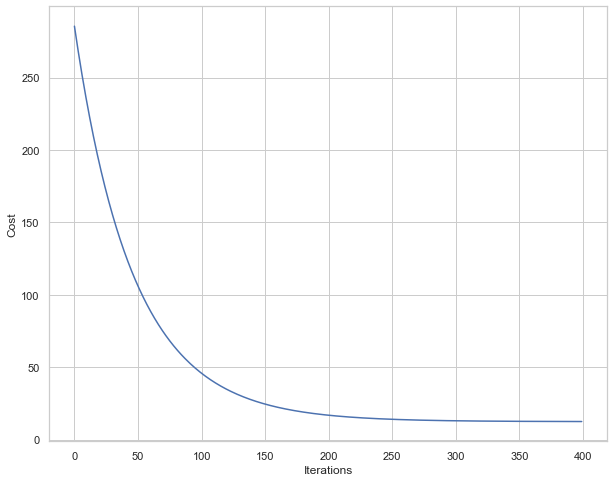

In [19]:
plt.figure()
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

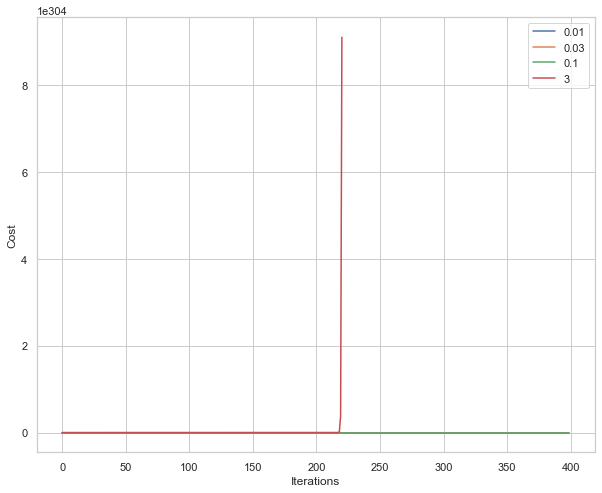

In [20]:
alphas =[0.01, 0.03,0.1,3]
plt.figure()
for alpha in alphas:
        theta=np.zeros(4)
        num_iters=400
        theta, J_history = gradientDescentMulti(x_train, y, theta, alpha, num_iters)
        plt.plot(np.arange(num_iters),J_history, label=str(alpha))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

# 1

In [21]:
X=pd.DataFrame(np.c_[data['LSTAT'], data['RM'],data['PTRATIO']], columns=['LSTAT', 'RM','PTRATIO'])
Y=data['MEDV']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=5)
print(X_train.shape) 
print(X_test.shape) 
print(Y_train.shape) 
print(Y_test.shape)



(197, 3)
(197, 3)
(197,)
(197,)


In [23]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
lin_model = LinearRegression()
lin_model.fit(X_train.fillna(X_train.mean()), Y_train)



LinearRegression()

In [24]:
#model evaluation for training set
y_train_predict = lin_model.predict(X_train) 
rmse=(np.sqrt(mean_squared_error(Y_train, y_train_predict))) 
r2=r2_score(Y_train, y_train_predict)

print("The model performance for training set") 
print("---------------------------------------------------------") 
print('slope: ',lin_model.coef_) 
print('Intercept: ', lin_model.intercept_) 
print('RMSE is {}'.format(rmse)) 
print('R2 score is {}'.format(r2)) 
print("\n")

#model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
#root mean square error of the model 
rmse= (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
#r-squared score of the model 
r2 =r2_score(Y_test, y_test_predict)
print("The model performance for testing set") 
print("---------------------------------------------") 
print('RMSE is {}'.format(rmse)) 
print('R2 score is {}'.format(r2))


The model performance for training set
---------------------------------------------------------
slope:  [-0.45297135  5.13703877 -0.97199868]
Intercept:  13.945494358023815
RMSE is 5.047562048599233
R2 score is 0.6957024486915813


The model performance for testing set
---------------------------------------------
RMSE is 4.928150481330881
R2 score is 0.7063635378790865


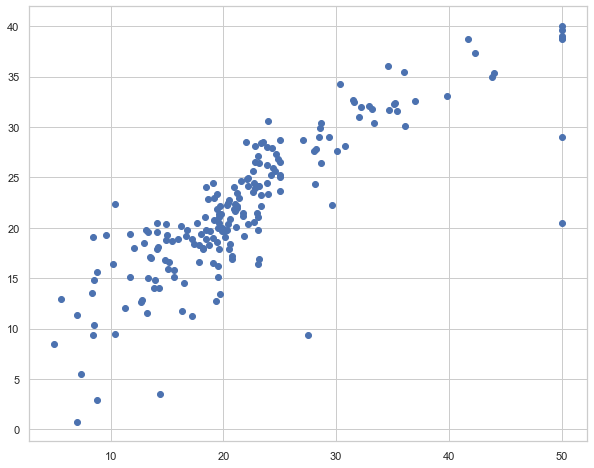

In [25]:
plt.scatter(Y_test, y_test_predict)
plt.show()

# 2

In [64]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(X_train)
pipe=LinearRegression()
pipe.fit(x_poly,Y_train)

LinearRegression()

In [65]:
y_poly_predict = pipe.predict(poly.fit_transform(X_train))

In [66]:
y_poly_test_predict= pipe.predict(poly.fit_transform(X_test))

# 3

In [69]:
y_poly_test_predict

array([21.30959243, 48.11709274, 19.93677999, 16.7299505 , 11.80760043,
       19.28750624, 36.430315  , 15.94069754, 37.58349229, 31.13322968,
       23.69264161, 17.7904845 , 30.83760004, 32.63689085, 14.86737631,
       22.06655806,  6.7790747 , 16.81152331, 20.68329138, 13.4281054 ,
       22.53958394, 12.55584787, 20.22172192, 21.53212345, 32.50035748,
       20.44404463, 27.82358842, 19.38517196, 18.78402247, 11.44365893,
       13.91424214, 25.38408457, 21.48499595, 19.98116885, 48.71946897,
       21.49985951, 19.48268636, 26.41721222, 21.36565808, 25.5590803 ,
       30.11602535, 22.00145215, 18.61360007, 15.88788926, 26.97788225,
       15.98082319, 11.83773891, 20.41757361, 14.19336852, 23.8877583 ,
        9.58275625, 15.91392718, 26.81225486, 24.19373576, 19.71854042,
       25.3870512 , 11.21286056, 17.18565367, 28.2547041 , 13.0980079 ,
       17.38390649, 27.60484514, 27.81569387, 24.16657747, 13.34679927,
       32.19246709, 17.06726341, 13.64466862, 36.16938126,  9.81

# 4

In [67]:
rmse_train = np.sqrt(mean_squared_error(Y_train, y_poly_predict))
r2_train = r2_score(Y_train, y_poly_predict)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(Y_test, y_poly_test_predict))
r2_test = r2_score(Y_test, y_poly_test_predict)

In [68]:
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 3.7106167774014414
R2 score of training set is 0.8355524783584021


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.3990335804548115
R2 score of test set is 0.7660319173076988


# 5

For the linear regression and the polynomial regression model, I would use the latter one, because the linear regression model can underfit the dataset as the relationship between the independent feature(in this case the LSTAT, RM, PTRATIO) is less linear with the dependent or target variable. And here they don't have the most linear relationship as indicated by the correlation matrix.